In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv("Lebanon_housingPrices_cleaned_dataset.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_name           1371 non-null   object 
 1   district_name          1371 non-null   object 
 2   area_sqm               1371 non-null   float64
 3   bedrooms               1371 non-null   int64  
 4   bathrooms              1371 non-null   int64  
 5   property_age_years     1371 non-null   int64  
 6   distance_to_beirut_km  1371 non-null   float64
 7   quality_score          1371 non-null   float64
 8   price_usd              1371 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 96.5+ KB


In [10]:
y = df['price_usd']
#dependent variable

In [11]:
X = df.drop(columns=['price_usd'])

In [12]:
#One-Hot Encoding
X = pd.get_dummies(X, columns=['district_name'], drop_first=True)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)


In [14]:
X.dtypes

country_name                    object
area_sqm                       float64
bedrooms                         int64
bathrooms                        int64
property_age_years               int64
distance_to_beirut_km          float64
quality_score                  float64
district_name_Bekaa               bool
district_name_Mount Lebanon       bool
district_name_Nabatieh            bool
district_name_North               bool
district_name_South               bool
dtype: object

In [15]:
cat_cols = X.select_dtypes(include='object').columns
cat_cols


Index(['country_name'], dtype='object')

In [16]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [17]:
X = X.drop(columns=['country_name'], errors='ignore')


In [18]:
X = pd.get_dummies(X, drop_first=True)


In [19]:

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X.columns


Index(['area_sqm', 'bedrooms', 'bathrooms', 'property_age_years',
       'distance_to_beirut_km', 'quality_score', 'district_name_Bekaa',
       'district_name_Mount Lebanon', 'district_name_Nabatieh',
       'district_name_North', 'district_name_South'],
      dtype='object')

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred = lr.predict(X_test_scaled)


In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 30869.31037291103
R2 Score: 0.7508959533003348


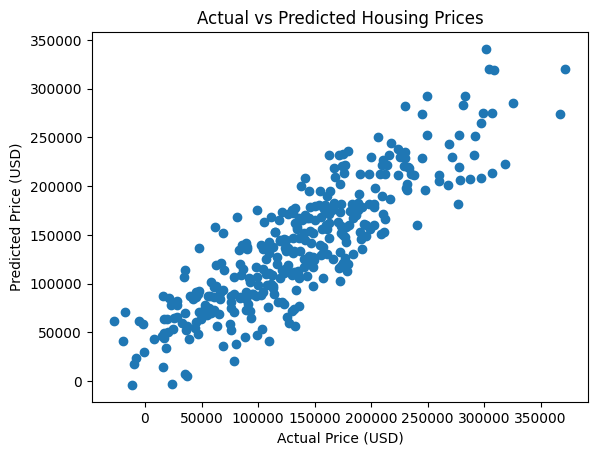

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


Mean absolute error: 30869.320932268834
R2 Score: 0.7508957676933381


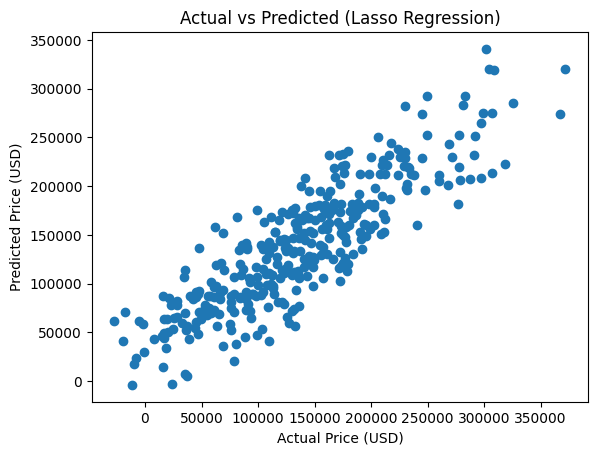

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error:", mae)
print("R2 Score:", score)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted (Lasso Regression)")
plt.show()


Cross validation lasso

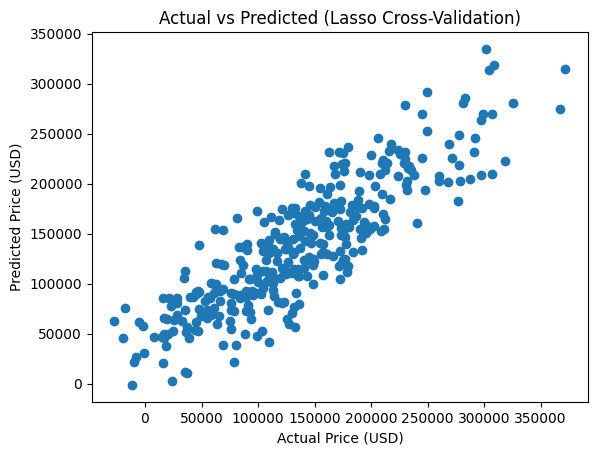

Mean absolute error: 30910.171055169052
R2 Score: 0.7491127385744167
Best alpha: 908.0017799273514


In [26]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

lassocv = LassoCV(cv=5, random_state=42)

lassocv.fit(X_train_scaled, y_train)

y_pred = lassocv.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted (Lasso Cross-Validation)")
plt.show()

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 Score:", score)
print("Best alpha:", lassocv.alpha_)


Ridge regression

Mean absolute error: 30871.303870931533
R2 Score: 0.7508605993529753


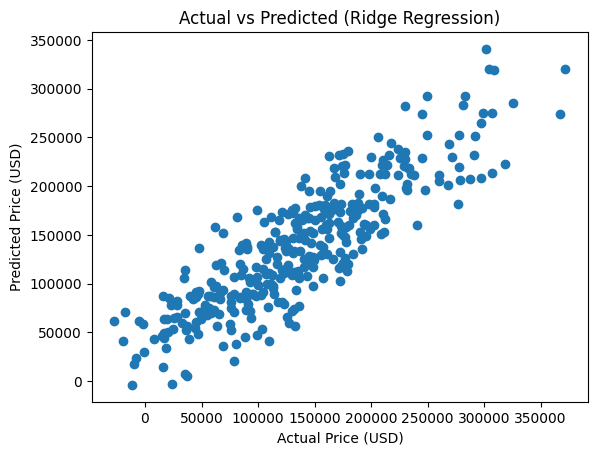

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

ridge = Ridge(alpha=1.0)

ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 Score:", score)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted (Ridge Regression)")
plt.show()


Best alpha: 10.0
Mean absolute error: 30888.734654212043
R2 Score: 0.750504363337386


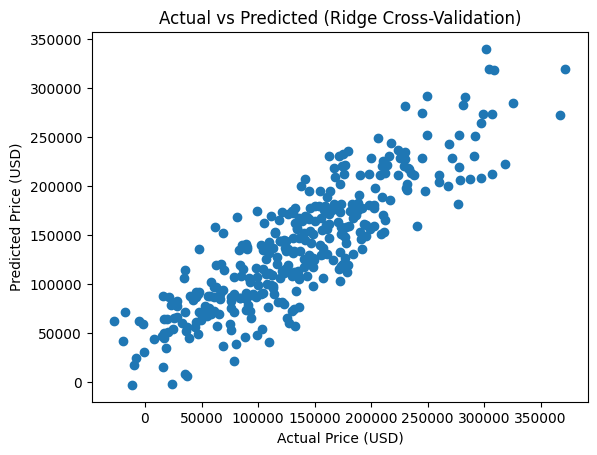

In [28]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

ridgecv = RidgeCV(
    alphas=[0.01, 0.1, 1, 10, 100],
    cv=5
)

ridgecv.fit(X_train_scaled, y_train)

y_pred = ridgecv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Best alpha:", ridgecv.alpha_)
print("Mean absolute error:", mae)
print("R2 Score:", score)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted (Ridge Cross-Validation)")
plt.show()


In [29]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': [0.01, 0.1, 1, 10, 100],
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

Mean absolute error: 33814.85779924804
R2 Score: 0.6925180330382237


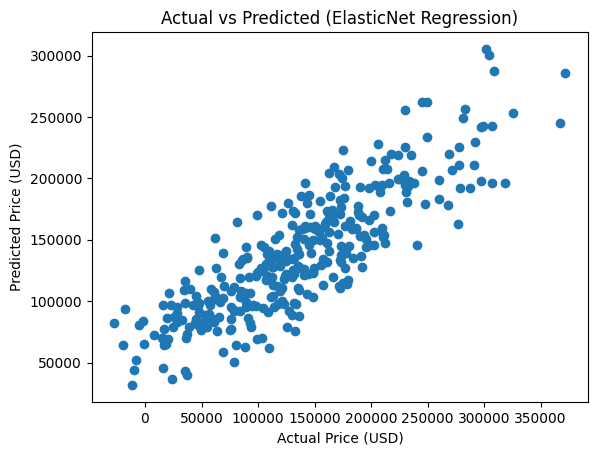

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

elastic = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

elastic.fit(X_train_scaled, y_train)

y_pred = elastic.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 Score:", score)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted (ElasticNet Regression)")
plt.show()


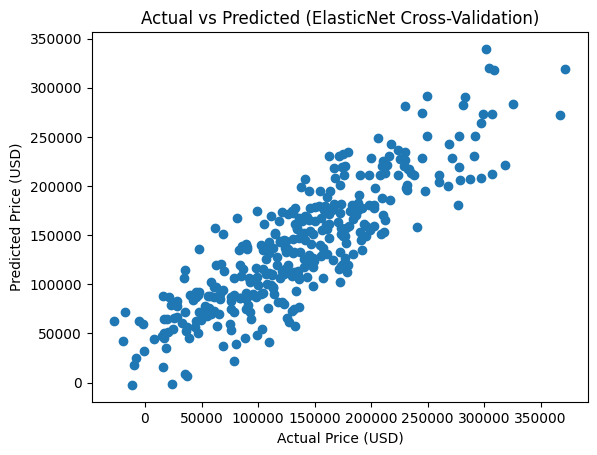

Best alpha: 0.15998587196060574
Best l1_ratio: 0.9
Mean absolute error: 30900.6765952161
R2 Score: 0.7502089249227585


In [31]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

elasticcv = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.9],
    alphas=np.logspace(-3, 1, 50),
    cv=5,
    random_state=42
)

elasticcv.fit(X_train_scaled, y_train)

y_pred = elasticcv.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted (ElasticNet Cross-Validation)")
plt.show()

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Best alpha:", elasticcv.alpha_)
print("Best l1_ratio:", elasticcv.l1_ratio_)
print("Mean absolute error:", mae)
print("R2 Score:", score)


In [32]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_ridgecv = ridgecv.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_lassocv = lassocv.predict(X_test_scaled)
y_pred_elastic = elastic.predict(X_test_scaled)



In [46]:
features = [
    "area_sqm",
    "bedrooms",
    "bathrooms",
    "property_age_years",
    "distance_to_beirut_km",
    "quality_score"
]

X = df[features]
y = df["price_usd"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [52]:
scaler.n_features_in_


6

In [53]:
#pickle the machine learning 


In [54]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [55]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [56]:
who = globals().keys()
print("scaler" in who)
print("ridge" in who)


True
True


In [60]:
import pickle

pickle.dump(ridge, open("ridge", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
